In [39]:
import nltk
from nltk.corpus import stopwords
import numpy as np
import glob
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
porter = nltk.stem.PorterStemmer()
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LinearRegression
from scipy import stats

In [40]:
def read(fileName):  # Function reading a txt file and giving as output the number of occurence of each word (Only word)
    f = open(fileName,encoding="utf-8")
    m = f.read()
    token = RegexpTokenizer(r'\w+')
    token = token.tokenize(m)
    token = [element for element in token if not element in stopwords.words('french') + stopwords.words('english')]  # Question 5 remove this line to include the stopword

    totalWords = len(token)

    stem = [porter.stem(w) for w in token]
    stem = np.asarray(stem)
    stemUnique = np.unique(stem)
    stem = list(stem)


    occurence = [[element, stem.count(element)] for element in stemUnique]
    occurence.sort(key=lambda x: x[1])
    occurence = occurence[::-1]


    return occurence,stemUnique,totalWords



In [41]:
##EXERCICE 2

Frequencies,Vocabulary,TotalWords = read("VingMilleLieues.txt")


Probabilities = [element[1]/TotalWords for element in Frequencies]
ProbabilitiesOverRank = [Probabilities[i]/(i+1) for i in range(len(Probabilities))]
TheoricalProbabilities = [0.1/(i+1) for i in range(len(Probabilities))]

ranks = [(i+1) for i in range(len(Frequencies))]


In [42]:
slope, intercept, r, p, se = stats.linregress(ranks,Probabilities)

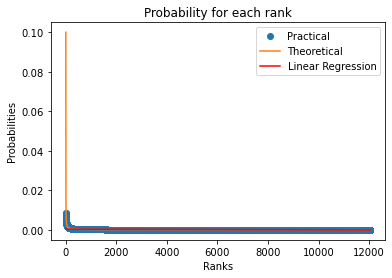

In [43]:
plt.plot(ranks,Probabilities,"o",label="Practical")
plt.plot(ranks,TheoricalProbabilities,label="Theoretical")
slopeMult = [element * slope for element in ranks]
plt.plot(ranks, intercept + slopeMult,'r',label="Linear Regression")

plt.xlabel("Ranks")
plt.ylabel("Probabilities")

plt.title("Probability for each rank")

plt.legend()
plt.show()


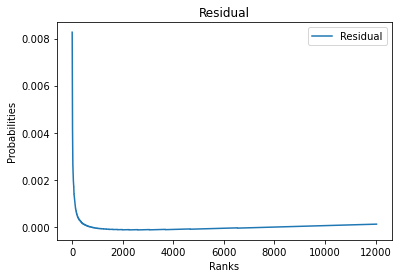

In [44]:
#Residual plot 
plt.plot(ranks,Probabilities-(intercept + slopeMult),label="Residual")

plt.xlabel("Ranks")
plt.ylabel("Probabilities")

plt.title("Residual")

plt.legend()
plt.show()

In [45]:

print(f"R-squared: {r**2:.6f}")
print(f"P-Value: {p**2:.6f}")

R-squared: 0.113162
P-Value: 0.000000


In [56]:
print("4 Very frequent words: ",Frequencies[7][0],Frequencies[1][0],Frequencies[5][0],Frequencies[6][0])
print("3 Averagely Frequent Words: ",Frequencies[23][0],Frequencies[24][0],Frequencies[25][0])
print("3 Very Rare Words: ",Frequencies[11000][0],Frequencies[11001][0],Frequencies[11002][0])

4 Very frequent words:  nemo capitain _nautilus_ mer
3 Averagely Frequent Words:  être dit heur
3 Very Rare Words:  chéri chère châteaux


In [47]:
## EXERCICE 1




def computeRP(rankList,relevantList,threshold):
    hypPositif = rankList[0:threshold]
    hypNegatif = rankList[threshold:-1]

    
    truePositif = 0 
    falsePositif = 0 
    falseNegatif = 0 
    
    
    for element in hypPositif:
        if relevantList[element] == 1:
            truePositif += 1
            
        if relevantList[element] == 0:
            falsePositif += 1
    
    for element in hypNegatif:
        if relevantList[element] == 1:
            falseNegatif += 1 
            

    p = truePositif/(truePositif+falsePositif)
    r = truePositif/(truePositif+falseNegatif)
    
    
    return p,r




In [48]:
#generate Two random queries

N = 50

rankList1 = random.sample(range(0,N),N)
relevantList1 = [random.randint(0,1) for i in range(N)]

rankList2 = random.sample(range(0,N),N)
relevantList2 = [random.randint(0,1) for i in range(N)]





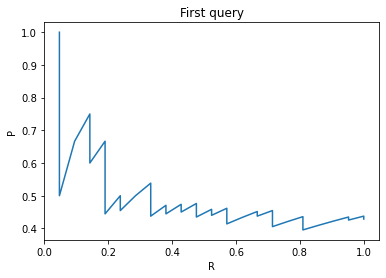

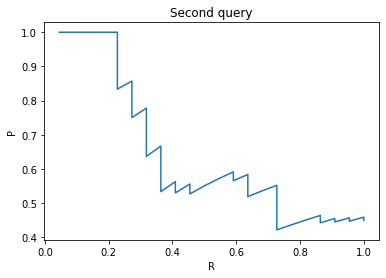

In [49]:
r = [computeRP(rankList1,relevantList1,i)[1] for i in range(1,N)]
p = [computeRP(rankList1,relevantList1,i)[0] for i in range(1,N)]
plt.plot(r,p)
plt.xlabel("R")
plt.ylabel("P")
plt.title("First query")
plt.show()

r2 = [computeRP(rankList2,relevantList1,i)[1] for i in range(1,N)]
p2 = [computeRP(rankList2,relevantList1,i)[0] for i in range(1,N)]
plt.plot(r2,p2)
plt.xlabel("R")
plt.ylabel("P")

plt.title("Second query")
plt.show()


In [50]:
#Average 11 point technique
rAverage = np.arange(0,1.1,0.1)

In [57]:
## 11 points technique

eps = 0.08

pAver1 = []
for element in rAverage:
    
    indexes = []
    for mesure in r:
        if abs(mesure - element) <= eps:
            indexes.append(mesure)
    
    p_cor = []
    for ind in indexes:
        p_cor.append(p[r.index(ind)])
    
    pAver1.append(max(p_cor))

    
    

In [52]:
pAver2 = []
for element in rAverage:
    
    indexes = []
    for mesure in r2:
        if abs(mesure - element) <= eps:
            indexes.append(mesure)
    
    p_cor = []
    for ind in indexes:
         p_cor.append(p2[r2.index(ind)])
    
    pAver2.append(max(p_cor))
    


In [53]:
pAverg = [(i + j)/2 for i,j in zip(pAver2,pAver1)]

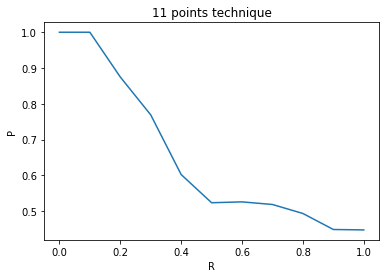

In [54]:
plt.plot(rAverage,pAverg)
plt.xlabel("R")
plt.ylabel("P")

plt.title("11 points technique")

plt.show()